In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


Dataset Head:
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     1                298.2                    308.7                    1408   
2     1                298.1                    308.5                    1498   
3     1                298.2                    308.6                    1433   
4     1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0         42.8                0       0             1  
1         46.3                3       0             1  
2         49.4                5       0             1  
3         39.5                7       0             1  
4         40.0                9       0             1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Co

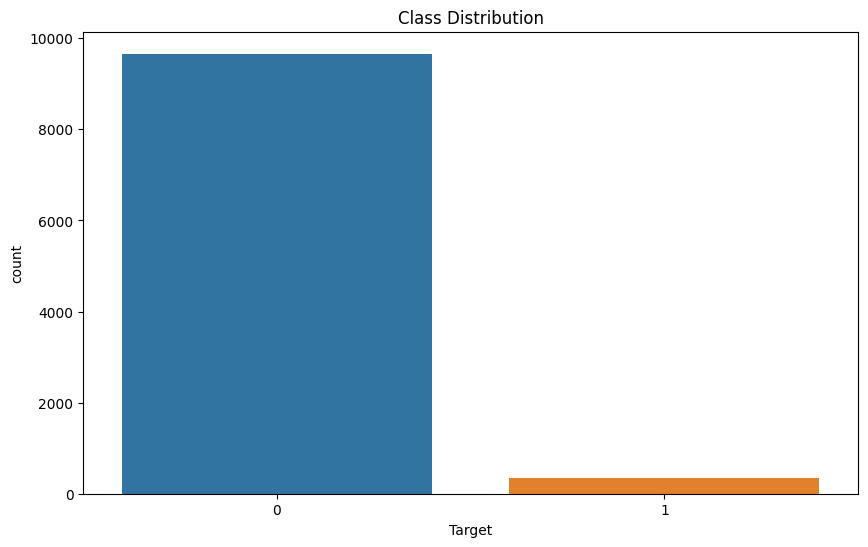

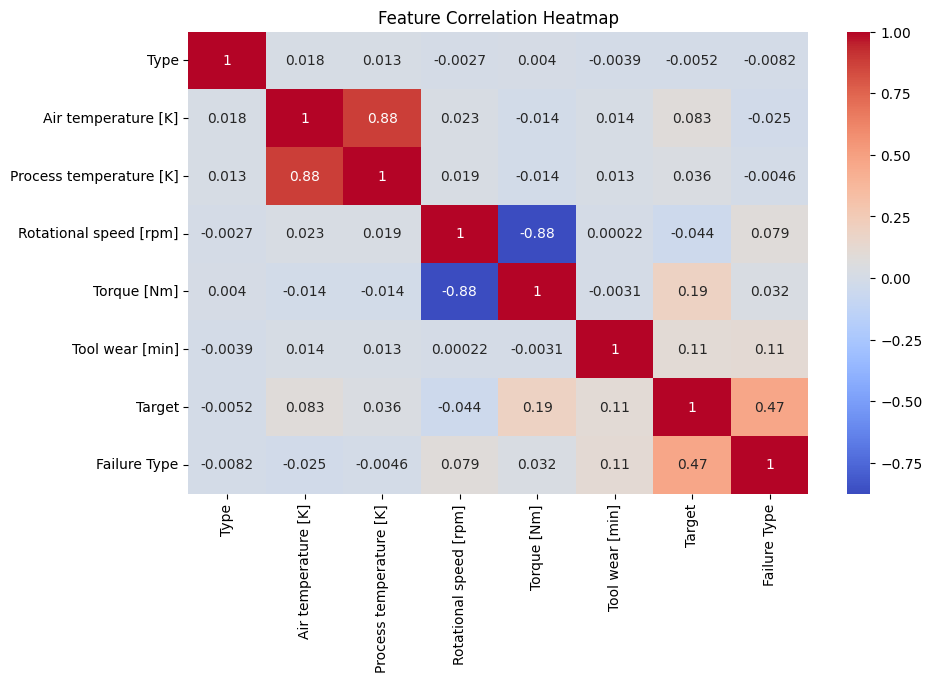

ValueError: could not determine the shape of object type 'Series'

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")  # Replace with actual file path

# Drop unnecessary columns
df.drop(columns=['UDI', 'Product ID'], inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['Target'].value_counts())

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Target'])
plt.title("Class Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocessing
X = df.drop(columns=['Target'])
y = df['Target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DNN Model
class DNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)

model = DNN(X_train.shape[1], len(np.unique(y)))

# Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, X_train, y_train, epochs=50):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

train_model(model, X_train_tensor, y_train_tensor)

# Evaluation
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_labels.numpy())
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred_labels.numpy()))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("machine_pdm.csv")  # Replace with actual file path

# Drop unnecessary columns
df.drop(columns=['UDI', 'Product ID'], inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['Target'].value_counts())

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Target'])
plt.title("Class Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocessing
X = df.drop(columns=['Target'])
y = df['Target']

# Apply SMOTE for data augmentation
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DNN Model
class DNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)

model = DNN(X_train.shape[1], len(np.unique(y_resampled)))

# Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, X_train, y_train, epochs=50):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

train_model(model, X_train_tensor, y_train_tensor)

# Evaluation
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_labels.numpy())
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred_labels.numpy()))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("machine_pdm.csv")  # Replace with actual file path

# Drop unnecessary columns
df.drop(columns=['UDI', 'Product ID'], inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['Target'].value_counts())

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Target'])
plt.title("Class Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocessing
X = df.drop(columns=['Target'])
y = df['Target']

# Apply SMOTE for data augmentation
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Multi-Class Classification DNN Model
class DNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes),
            nn.Softmax(dim=1)  # Ensure outputs sum to 1 for multi-class classification
        )
    
    def forward(self, x):
        return self.model(x)

model = DNN(X_train.shape[1], len(np.unique(y_resampled)))

# Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, X_train, y_train, epochs=50):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

train_model(model, X_train_tensor, y_train_tensor)

# Evaluation
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_labels.numpy())
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred_labels.numpy()))
